In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_x = pd.read_csv('SAMPLE_P98.csv', sep=",")


data_x.head(20) 

,PLANT,MACHINENAME,TOOLNUMBER,PRODUCTIONRUN,PARTNUMBER,SERIALNUMBER,CYCLENUMBER,CYCLETIME,FILLTIME,SCREWRETPOSITION,TRANSITIONPOSITION,CUSHIONSIZE,REFILLTIME,TRANSITIONPRESSURE,STOREDDATE,PEAKPRESSURE,ISBADPIECE
0,FW98,1,13842507 PM A 0001,863579,13842507,9894426583,1,27.4,0.64,1.60,0.3,0.18,4.54,500,5/10/2018 0:04,569,True
1,FW98,1,13842507 PM A 0001,863579,13842507,9894426583,1,32.1,0.64,1.58,0.3,0.20,4.50,478,5/10/2018 0:03,539,True
2,FW98,1,13842507 PM A 0001,863579,13842507,9894426583,10,27.8,0.65,1.58,0.3,0.21,4.89,543,5/10/2018 0:08,616,False
3,FW98,1,13842507 PM A 0001,863579,13842507,9894426583,100,28.4,0.66,1.59,0.3,0.21,5.60,543,5/10/2018 0:53,612,False
4,FW98,1,13842507 PM A 0001,863579,13842507,9894426583,101,28.2,0.67,1.57,0.3,0.23,5.50,543,5/10/2018 0:53,612,False
5,FW98,1,13842507 PM A 0001,863579,13842507,9894426583,102,28.2,0.66,1.56,0.3,0.23,5.49,557,5/10/2018 0:54,619,False
6,FW98,1,13842507 PM A 0001,863579,13842507,9894426583,103,28.2,0.67,1.57,0.3,0.23,5.55,563,5/10/2018 0:54,631,False
7,FW98,1,13842507 PM A 0001,863579,13842507,9894426583,104,28.3,0.67,1.57,0.3,0.23,5.53,558,5/10/2018 0:55,629,False
8,FW98,1,13842507 PM A 0001,863579,13842507,9894426583,105,28.4,0.67,1.57,0.3,0.22,5.50,550,5/10/2018 0:55,612,False
9,FW98,1,13842507 PM A 0001,863579,13842507,9894426583,106,28.3,0.67,1.57,0.3,0.22,5.49,548,5/10/2018 0:55,608,False


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.24.2
matplotlib version: 3.0.3
NumPy version: 1.16.2
SciPy version: 1.2.1
IPython version: 7.4.0
scikit-learn version: 0.20.3


In [4]:
print(data_x.shape)

(440030, 17)


In [5]:
feature_cols = ['PEAKPRESSURE', 'CYCLETIME','FILLTIME','SCREWRETPOSITION','TRANSITIONPOSITION','CUSHIONSIZE','REFILLTIME','TRANSITIONPRESSURE']
X = data_x[feature_cols]
y = data_x.ISBADPIECE

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
from sklearn.preprocessing import LabelEncoder
X_train=X_train.apply(LabelEncoder().fit_transform)

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.03


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.36


In [10]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.96
Accuracy of GNB classifier on test set: 0.97


In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

C:\Users\Gokhan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = gnb.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[106921    105]
 [  2964     18]]
              precision    recall  f1-score   support

       False       0.97      1.00      0.99    107026
        True       0.15      0.01      0.01      2982

   micro avg       0.97      0.97      0.97    110008
   macro avg       0.56      0.50      0.50    110008
weighted avg       0.95      0.97      0.96    110008



In [14]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, pred)
cnf_matrix=([[106921,  105],[ 2964,  18]])

Text(0.5, 257.44, 'Predicted label')

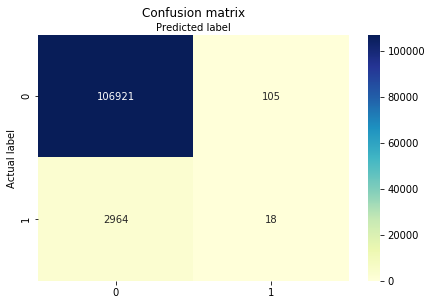

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#Text(0.5,257.44,'Predicted label')

In [ ]:
##Work in process##
#1.Rerun from this cell onward...Solve the error on the precisin and recall functions.
#2.Further feature engineering is needed.

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))
#recall_score(Y_test, y_predict, average="binary", pos_label="neg")
print("Precision:",metrics.precision_score(y_test, pred,pos_label="False"))
print("Recall:",metrics.recall_score(y_test, pred,pos_label="False"))

Accuracy: 0.9721020289433496


ValueError: pos_label='False' is not a valid label: array([False,  True])

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label="FALSE")
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
plt.xlabel('height (cm)')
plt.ylabel('width (cm)')
plt.title("4-Class classification (k = %i, weights = '%s')"
           % (n_neighbors, weights))    
plt.show()
plot_fruit_knn(X_train, y_train, 5, 'uniform')

In [ ]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=1)